# MuSCAT2 transit analysis template

This template shows the steps for a basic transit analysis using WASP-43b light curve observed on 18.2.2018 as an example.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from muscat2ta.transitanalysis import TransitAnalysis

## Transit analysis initialisation

The transit analysis is done with a `TransitAnalysis` class that takes the root data directory (`droot`), target name (`target`), observing night (`night`), target ID (`tid`), and a list of comparison star IDs (`cids`). 

The data should be organized so that the photometry files are in `droot/target/night`.

In [3]:
ta = TransitAnalysis('data', 'wasp-43b', '180218', tid = 0, cids = [1,2,3])

## Global optimisation

The global optimisation step aims to find the best combination of reference stars (from the set of reference star IDs given in the initialisation), target and reference apertures, global posterior maximum for the transit model, and the trends modelled as a linear combination of covariates.

In [37]:
ta.optimize(niter = 1000)

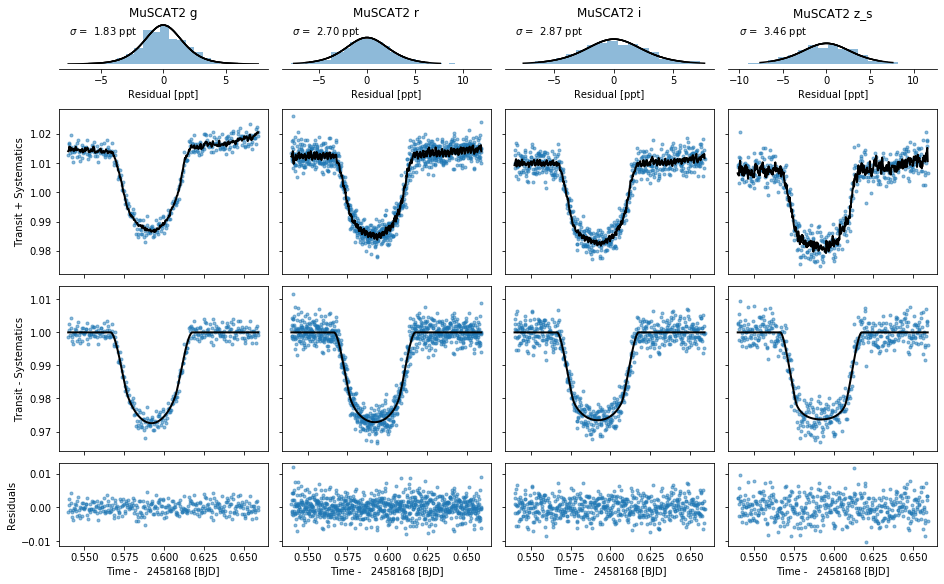

In [38]:
ta.plot_light_curve();

The photometry should be frozen with `freeze_photometry()` after a good solution has been found. This fixes the reference stars and the target and reference apertures to the best-fit solution, and makes the MCMC sampling significantly more efficient.

In [39]:
ta.lmlpf.freeze_photometry()

In [46]:
ta.optimize(niter = 1000)

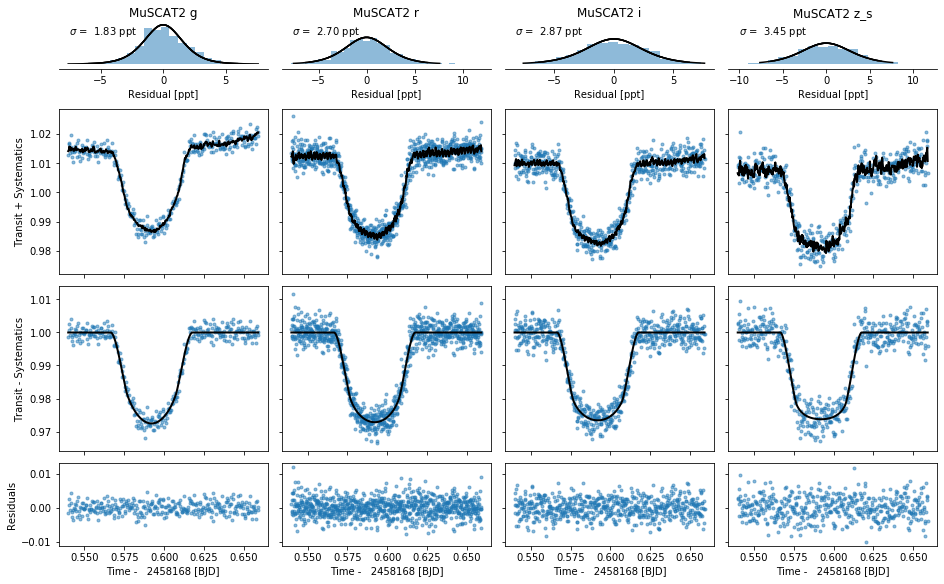

In [47]:
ta.plot_light_curve();

## MCMC Sampling

In [52]:
ta.sample(niter = 1000, thin = 10, repeats = 3)

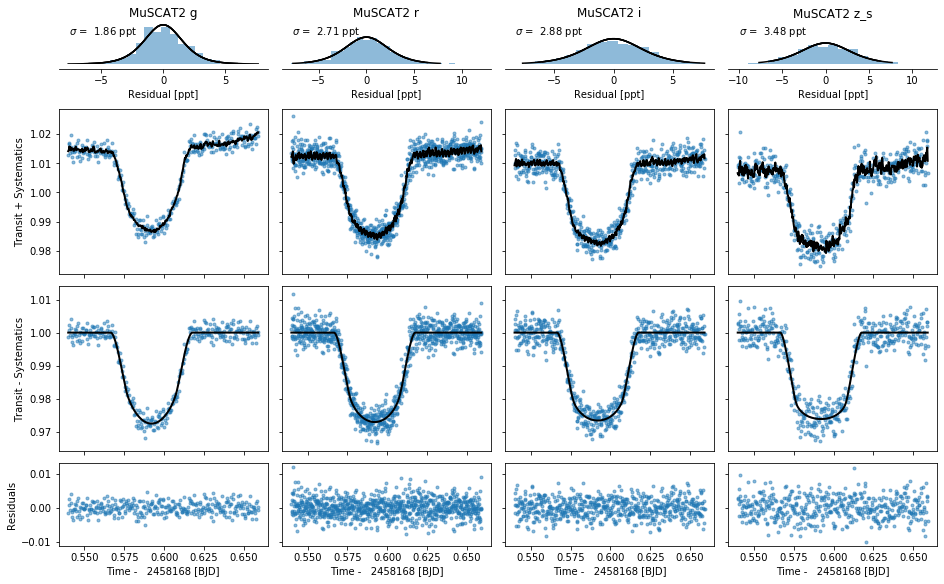

In [50]:
ta.plot_light_curve(method = 'mc', figsize=(13, 8));

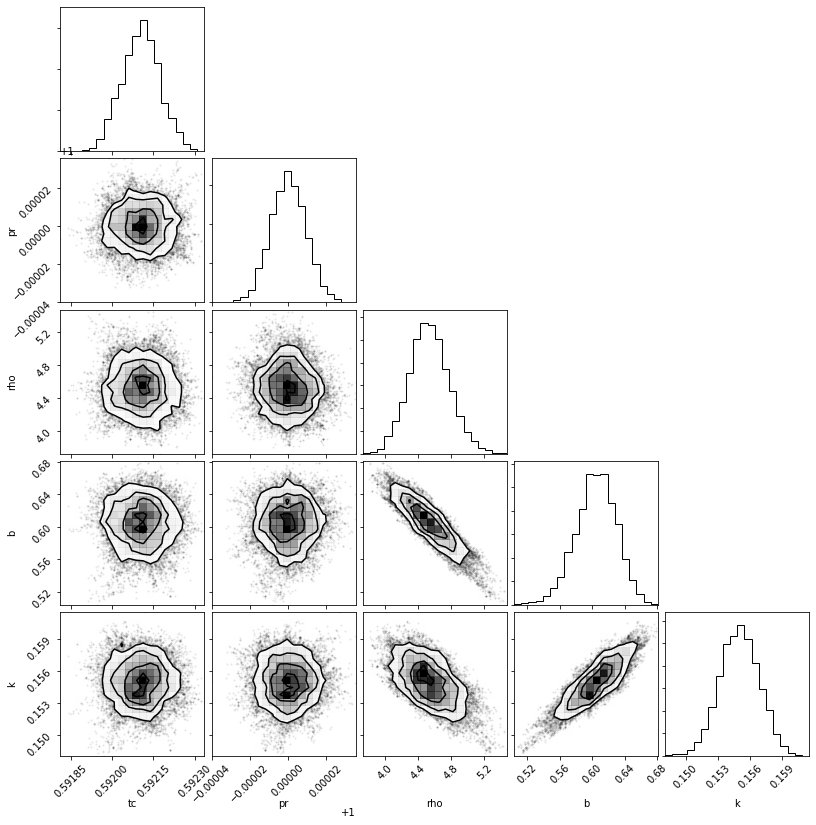

In [51]:
ta.plot_basic_posteriors('linear');

## Saving

In [10]:
ta.save()

In [49]:
ta.save_fits()

IndexError: index 0 is out of bounds for axis 1 with size 0

---

<center> &copy; 2019 Hannu Parviainen </center>